In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn

In [2]:
data = pd.read_csv('/Users/Edvinas/OneDrive/Documents/data/aviation_data.csv', index_col='id')
data = data.drop(data.columns[0], axis=1) # dropping an index column



print('This dataset contains {} observations and {} attributes'.format(*data.shape))
data

This dataset contains 129880 observations and 23 attributes


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172.00000,Male,Loyal Customer,13.000000,Personal Travel,Eco Plus,460.000000,3.000000,4.000000,3.000000,1.000000,...,5.000000,4.000000,3.000000,4.000000,4.000000,5.000000,5.000000,25.000000,18.000000,neutral or dissatisfied
5047.00000,Male,disloyal Customer,25.000000,Business travel,Business,235.000000,3.000000,2.000000,3.000000,3.000000,...,1.000000,1.000000,5.000000,3.000000,1.000000,4.000000,1.000000,1.000000,6.000000,neutral or dissatisfied
110028.00000,Female,Loyal Customer,26.000000,Business travel,Business,1142.000000,2.000000,2.000000,2.000000,2.000000,...,5.000000,4.000000,3.000000,4.000000,4.000000,4.000000,5.000000,0.000000,0.000000,satisfied
24026.00000,Female,Loyal Customer,25.000000,Business travel,Business,562.000000,2.000000,5.000000,5.000000,5.000000,...,2.000000,2.000000,5.000000,3.000000,1.000000,4.000000,2.000000,11.000000,9.000000,neutral or dissatisfied
119299.00000,Male,Loyal Customer,61.000000,Business travel,Business,214.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,0.000000,0.000000,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58805.45150,Female,Loyal Customer,38.187478,Business travel,Business,1036.489743,2.493064,3.433047,2.886652,3.641987,...,2.625779,3.186306,2.799034,3.241455,2.922617,3.105155,2.671643,11.482499,7.632232,satisfied
58805.20623,Male,Loyal Customer,38.187405,Business travel,Business,1036.482187,2.493054,3.433063,2.886659,3.642014,...,2.625747,3.186298,2.799011,3.241440,2.922602,3.105131,2.671617,11.482348,7.631916,satisfied
58804.96096,Male,Loyal Customer,38.187332,Personal Travel,Eco,1036.474632,2.493044,3.433079,2.886665,3.642041,...,2.625716,3.186290,2.798987,3.241424,2.922587,3.105108,2.671592,11.482198,7.631599,neutral or dissatisfied


In [3]:
data['Arrival Delay in Minutes'].value_counts()

0.000000     59972
1.000000      2288
2.000000      2115
3.000000      2010
4.000000      1968
             ...  
8.989776         1
12.091874        1
13.052913        1
13.631056        1
14.270905        1
Name: Arrival Delay in Minutes, Length: 23188, dtype: int64

In [4]:
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             321
satisfaction                           0
dtype: int64

In [5]:
print('This dataset contains {} observations and {} attributes'.format(*data.shape))

This dataset contains 129880 observations and 23 attributes


In [6]:
data = data.dropna()

In [34]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172.0,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460.0,3.0,4.0,3.0,1.0,...,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied
5047.0,Male,disloyal Customer,25.0,Business travel,Business,235.0,3.0,2.0,3.0,3.0,...,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,neutral or dissatisfied
110028.0,Female,Loyal Customer,26.0,Business travel,Business,1142.0,2.0,2.0,2.0,2.0,...,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,satisfied
24026.0,Female,Loyal Customer,25.0,Business travel,Business,562.0,2.0,5.0,5.0,5.0,...,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,neutral or dissatisfied
119299.0,Male,Loyal Customer,61.0,Business travel,Business,214.0,3.0,3.0,3.0,3.0,...,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,satisfied


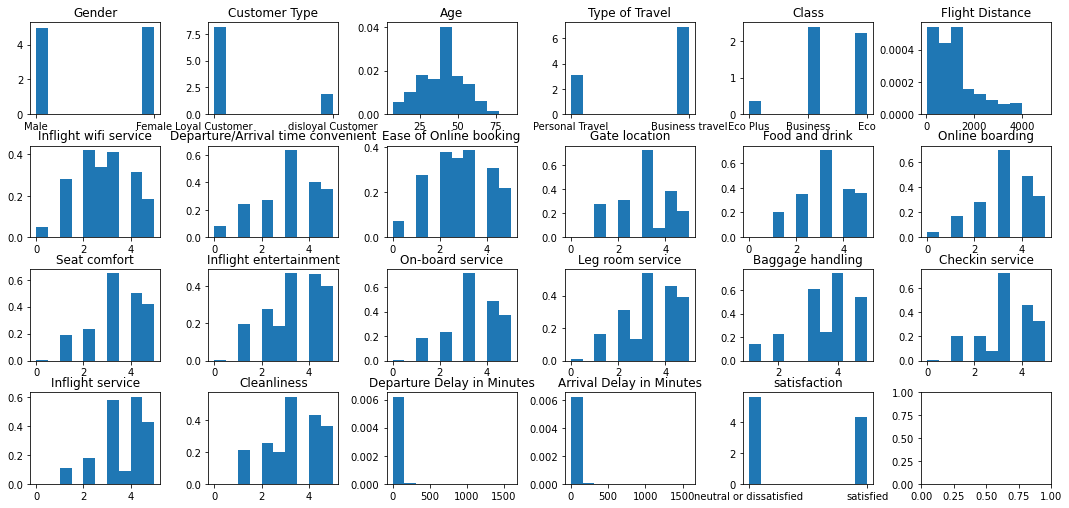

In [35]:
rows, columns = 4,6
# Show the distribution for all attributes
fig, axs = plt.subplots(rows,columns, figsize=(15,7))   # initialize 4 by 6 plot grid
fig.tight_layout()                                      # set layout
column_names = [column for column in data]              # Get column names into list
i = 0
for x in range(rows):                                   # Fill plot grid
    for y in range(columns):
        if i < data.shape[1]:
            axs[x,y].hist(data[column_names[i]], density=True)
            axs[x,y].set(title=column_names[i])
            i += 1

In [7]:
# This takes a few minutes to run
import seaborn as sns
#sns.pairplot(pd.get_dummies(data)) can't see anything
#plt.show()

In [8]:
data.select_dtypes('object').describe()

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129559,129559,129559,129559,129559
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65226,105819,89678,62142,73304


In [9]:
data.select_dtypes('int64').describe()

ValueError: Cannot describe a DataFrame without columns

In [10]:
dummies = pd.get_dummies(data) # get dummies
dummies_norm = (dummies - dummies.min()) / (dummies.max() - dummies.min()) # min-max normalization

In [11]:
corr = dummies_norm.corr() # get pearson correlation matrix

In [12]:
corr = corr.mask(np.tril(np.ones(corr.shape)).astype(np.bool)) # remove the lower half of the triangle

In [42]:
corr_filtered = corr[abs(corr) >= 0.4].stack().reset_index() # filter out low correlation values
corr_filtered.columns = ['Pair1', 'Pair2', 'Coefficient'] # renaming columns
corr_filtered = corr_filtered.sort_values(kind="quicksort", by='Coefficient') # sorting rows by "Coefficient"
corr_filtered = corr_filtered.drop([23,25,24,39]) # dropping values that are the exact opposites of each other
corr_filtered['Pair'] = corr_filtered.agg('{0[Pair1]} / {0[Pair2]}'.format, axis=1) # concetenate the pair columns
corr_filtered = corr_filtered.set_index('Pair') # change index to Pair

KeyError: '[39] not found in axis'

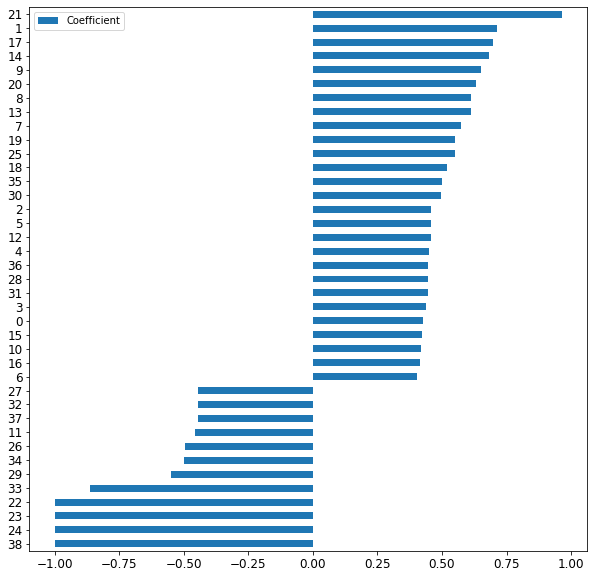

In [43]:
corr_filtered.plot(kind='barh', figsize=(10,10), fontsize=12);

In [13]:
dummies_norm.pop('satisfaction_neutral or dissatisfied')
y = dummies_norm.pop('satisfaction_satisfied')
x = dummies_norm

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train.size

2798469

In [15]:
X_train.shape

(103647, 27)

In [16]:
X_test.shape

(25912, 27)

In [48]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import cross_val_score

results = {'alpha':[],'OLS':[],'Lasso':[],'Ridge':[],'Elastic':[]}
n = 10
for a in np.linspace(0.01, 1, num=10):
  results['alpha'].append(a)
  for name,met in [
          ('OLS', LinearRegression()),
          ('Lasso', Lasso(fit_intercept=True, alpha=a)),
          ('Ridge', Ridge(fit_intercept=True, alpha=a)),
          ('Elastic', ElasticNet(fit_intercept=True, alpha=a))
          ]:
      results[name].append(abs(cross_val_score(met, x, y, cv=n,scoring='neg_root_mean_squared_error').mean()))

results = pd.DataFrame.from_dict(results)

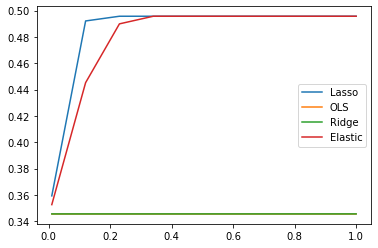

In [49]:
import matplotlib.pyplot as plt

plt.plot(results['alpha'],results['Lasso'],label='Lasso')
plt.plot(results['alpha'],results['OLS'],label='OLS')
plt.plot(results['alpha'],results['Ridge'],label='Ridge')
plt.plot(results['alpha'],results['Elastic'],label='Elastic')
plt.legend()

In [18]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import cross_val_score
# XG Boost random forest with hyperparameter optimization
# grid search
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2500, num = 20)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,6,7,8,9,10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,3, 4,5,6]

#for later use in regularized gradient boost
alpha = [0.5,1,5]

In [51]:
n_estimators

[200,
 321,
 442,
 563,
 684,
 805,
 926,
 1047,
 1168,
 1289,
 1410,
 1531,
 1652,
 1773,
 1894,
 2015,
 2136,
 2257,
 2378,
 2500]

In [20]:
def modelOptimization(clf,grid,x,y):
        # Random Grid Search Using 5-fold Cross Validation

        clfmodel = RandomizedSearchCV(estimator = clf,param_distributions = grid, n_iter =50, cv=3,verbose =1, random_state=2021,n_jobs=-1)

        clfmodel.fit(x,y)
        print('Model Best Score: \n',clfmodel.best_score_)
        print('Model Best Parameters: \n',clfmodel.best_params_)

In [ ]:
# XG Boost

# Training
import xgboost as xgb
from sklearn.metrics import mean_squared_error

gb = xgb.XGBClassifier()

# Grid
gbgrid = {'n_estimators': n_estimators,    # optimizing number of trees and tree depth
               'max_depth': max_depth,
               'eval_metric': ['error'],
                 'alpha:': alpha}
modelOptimization(gb,gbgrid,x,y)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


In [ ]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
# Grid
adagrid = {   # optimizing number of trees and tree depth
               'n_estimators':n_estimators,
                'learning_rate':[0.1,0.5,1,2,3],
                'algorithm':['SAMME','SAMME.R']}
modelOptimization(ada,adagrid,x,y)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [ ]:
>>> from sklearn import datasets, linear_model,metrics
>>> from sklearn.model_selection import cross_validate
>>> from sklearn.metrics import make_scorer
>>> from sklearn.metrics import confusion_matrix, accuracy_score


In [ ]:
bestxgb=xgb.XGBClassifier(n_estimators=200,max_depth=40,eval_metric='logloss',alpha=1)
cv_results = cross_validate(bestxgb,x,y,cv=5,
                           scoring=('r2','neg_mean_squared_error','accuracy'),
                           return_train_score=True)
print(cv_results['test_neg_mean_squared_error'])
print(cv_results['test_r2'])
print(cv_results['accuracy'])

In [ ]:
print(cv_results['test_neg_mean_squared_error'])
print(cv_results['test_r2'])
print(cv_results['accuracy'])

In [ ]:
def fit_predict_score(clf):
    """Predicts the average accuracy score of a classifier clf and outputs a confusion matrix."""
    clf.fit(X_train, np.ravel(y_train)) # fitting the model to the training data
    predicted = clf.predict(X_test) #getting predicted values
    
    #cross tabulation of predicted and actual values produces the correlation matrix
    confusion_matrix =  pd.crosstab(index=np.ravel(y_test), columns=predicted.ravel(), rownames=['Expected'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    accuracy = np.round(metrics.accuracy_score(y_test , predicted),3)
    plt.title(clf , fontsize = 12)
    plt.suptitle(accuracy)
    plt.show()
    print (metrics.classification_report(y_test,predicted))

In [ ]:
def roccurve(clf):
# crea`ting roc curve
    predicted = clf.predict(X_test) #getting y hat
    fpr,tpr,_ = metrics.roc_curve(y_test,predicted)  #comparing y hat and the actuall y 
    #plotting
    plt.title('ROC Curve')
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
def prcurve(clf):
    predicted = clf.predict(X_test)
    precision,recall,_ = precision_recall_curve(y_test,predicted)
    #plotting
    plt.plot(recall,precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title("Precision Recall Curve")
    plt.show()

In [ ]:
def metrics_report(model):
        fit_predict_score(model)
        roccurve(model)
        prcurve(model)

In [ ]:
metrics_report(bestxgb)